# Install dependencies

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


# Data cleaning and handling missing values

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# 2. Load the dataset from the 'data' folder
file_path = "../data/marketing_campaign1.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

In [4]:
# 3. Quick EDA - Display the first few rows
print("Dataset Preview:")
display(df.head())


Dataset Preview:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# 4. Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display missing values information
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print("\nMissing Values in Each Column:")
display(missing_data[missing_data['Missing Values'] > 0])



Missing Values in Each Column:


,Missing Values,Percentage
Income,24,1.071429


In [6]:
# 5. Handle Missing Values
# Drop columns with more than 50% missing values
threshold = 50  # Set threshold for missing percentage
cols_to_drop = missing_data[missing_data['Percentage'] > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns with more than {threshold}% missing values: {list(cols_to_drop)}")

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values handled successfully!")


Dropped columns with more than 50% missing values: []

Missing values handled successfully!


In [7]:


# 6. Summary Statistics after handling missing values
print("\nDataset Summary:")
display(df.describe(include='all'))


Dataset Summary:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:

# Check missing values
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# Outlier detection and removing using IQR (Interquartile Range)

Because the data is skewed, we will use the IQR method to detect and remove outliers instead of z-score

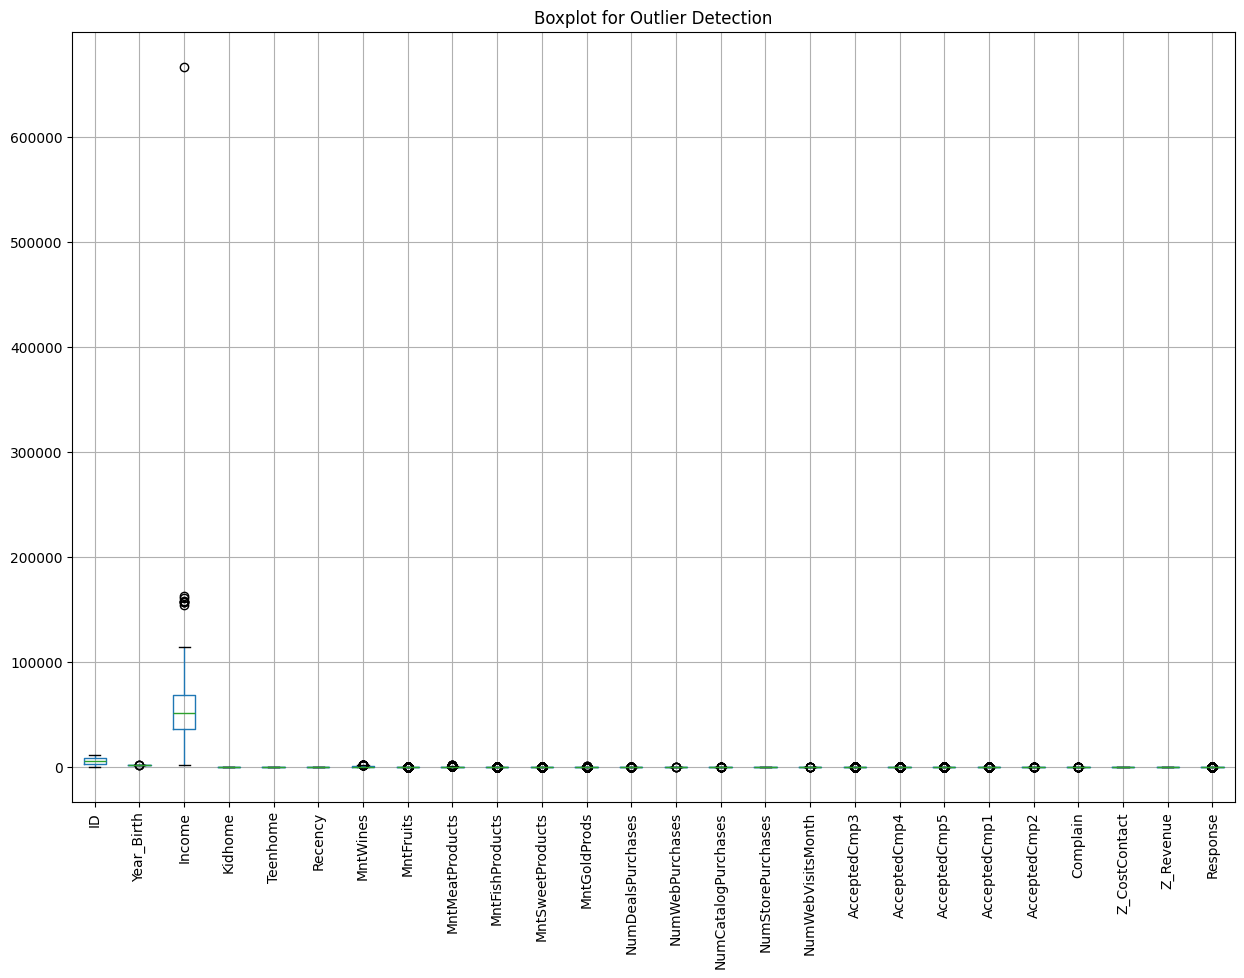

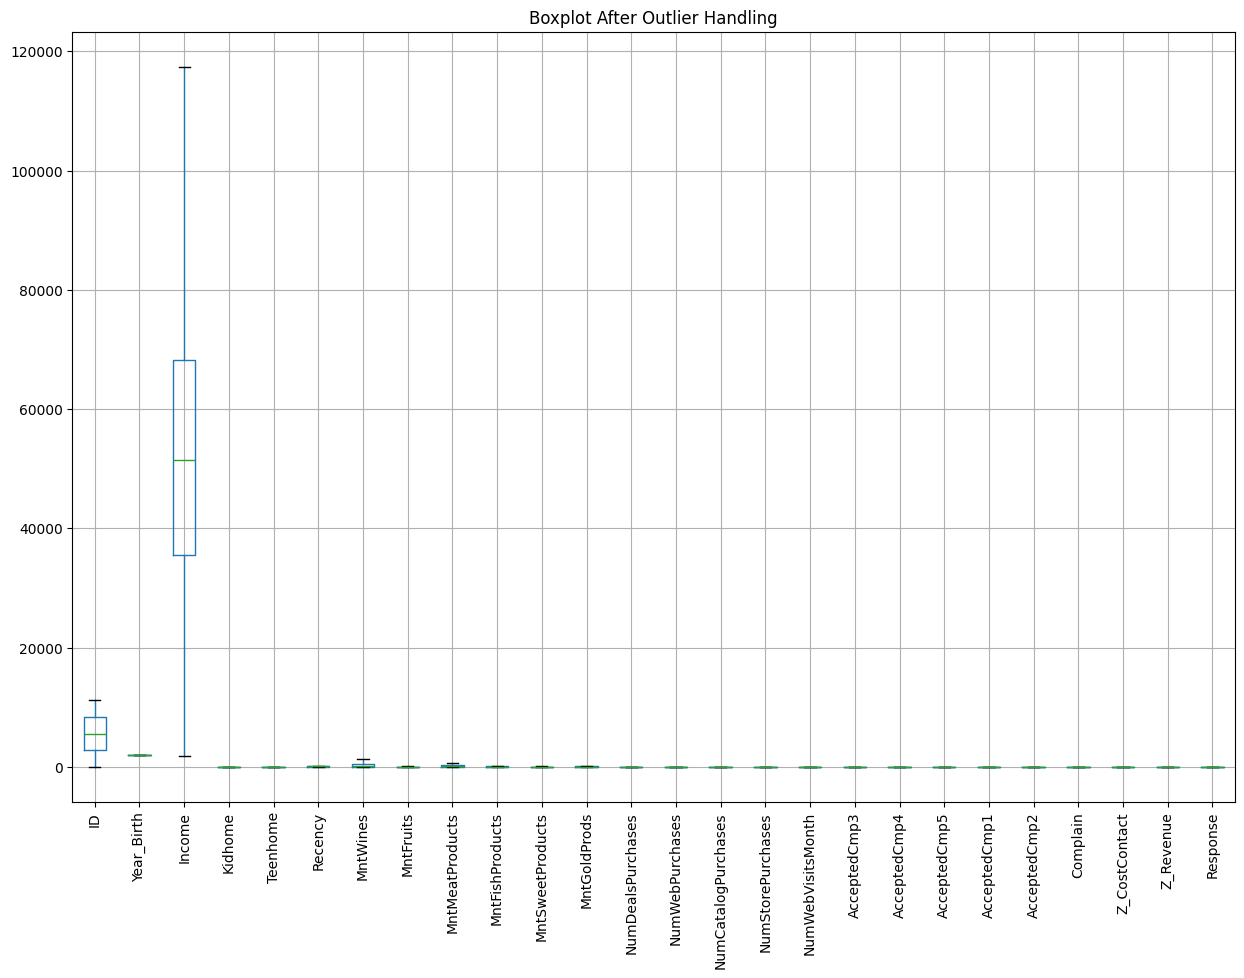

In [9]:
import matplotlib.pyplot as plt
# Detect outliers using the Z-score method
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplot before handling outliers
plt.figure(figsize=(15, 10))
df[num_cols].boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Handling outliers using IQR method (Replacing with upper/lower bounds)
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Boxplot after handling outliers
plt.figure(figsize=(15, 10))
df[num_cols].boxplot(rot=90)
plt.title("Boxplot After Outlier Handling")
plt.show()


# Feature transformation

### Apply  one hot encoding 

In [10]:

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


### Check the final data set

In [11]:
# Assuming df_final is the final dataset after processing

# Check for categorical columns in the final dataset
categorical_columns_final = df.select_dtypes(include=['object'])

# Print the categorical columns (if any)
print("Categorical columns in the final dataset:")
print(categorical_columns_final)


Categorical columns in the final dataset:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2240 rows x 0 columns]


### After encoding you can see catergorical convert into true or false which means 0 or 1 

## Feature engineering


# Creating new features

In [12]:

# Creating new features
df['Age'] = datetime.now().year - df['Year_Birth']  # Age calculation
df['Tenure'] = (datetime.now() - df['Dt_Customer']).dt.days  # Tenure in days(How long the customer has been in the company)
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])  # Total spending


## Data Type Conversion (Ensuring Correct Types)

In [13]:

# Ensure 'Dt_Customer' is in datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Convert numerical columns to appropriate types
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 
                'Z_CostContact', 'Z_Revenue', 'Age', 'Tenure', 'Total_Spending']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to integer/float

# Verify final data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   float64       
 1   Year_Birth               2240 non-null   float64       
 2   Income                   2240 non-null   float64       
 3   Kidhome                  2240 non-null   float64       
 4   Teenhome                 2240 non-null   float64       
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   float64       
 7   MntWines                 2240 non-null   float64       
 8   MntFruits                2240 non-null   float64       
 9   MntMeatProducts          2240 non-null   float64       
 10  MntFishProducts          2240 non-null   float64       
 11  MntSweetProducts         2240 non-null   float64       
 12  MntGoldProds             2240 non-

### Univariate and Bivariate Analysis

##### Descriptive Statistics, Compute basic statistics such as mean, median, mode, standard deviation, min, and max for numerical columns

#### This will provide key statistics like mean, median, standard deviation, etc, Helps to detect skewness and outliers in the data.


In [14]:
# Basic Descriptive Statistics for numerical variables
desc_stats = df.describe().T  # Transpose for better readability
desc_stats['mode'] = df.mode().iloc[0]  # Add mode separately
desc_stats

,count,mean,min,25%,50%,75%,max,std,mode
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198,0.0
Year_Birth,2240.0,1968.852232,1932.0,1959.0,1970.0,1977.0,1996.0,11.771725,1976.0
Income,2240.0,51865.874554,1730.0,35538.75,51381.5,68289.75,117416.25,20936.104821,51381.5
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398,0.0
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538,0.0
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN,2012-08-31 00:00:00
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453,56.0
MntWines,2240.0,302.112946,0.0,23.75,173.5,504.25,1225.0,331.057356,2.0
MntFruits,2240.0,21.679018,0.0,1.0,8.0,33.0,81.0,27.257348,0.0
MntMeatProducts,2240.0,150.873214,0.0,16.0,67.0,232.0,556.0,178.816658,556.0


### Create Histograms, Box Plots, and Density Plots for key numerical variables

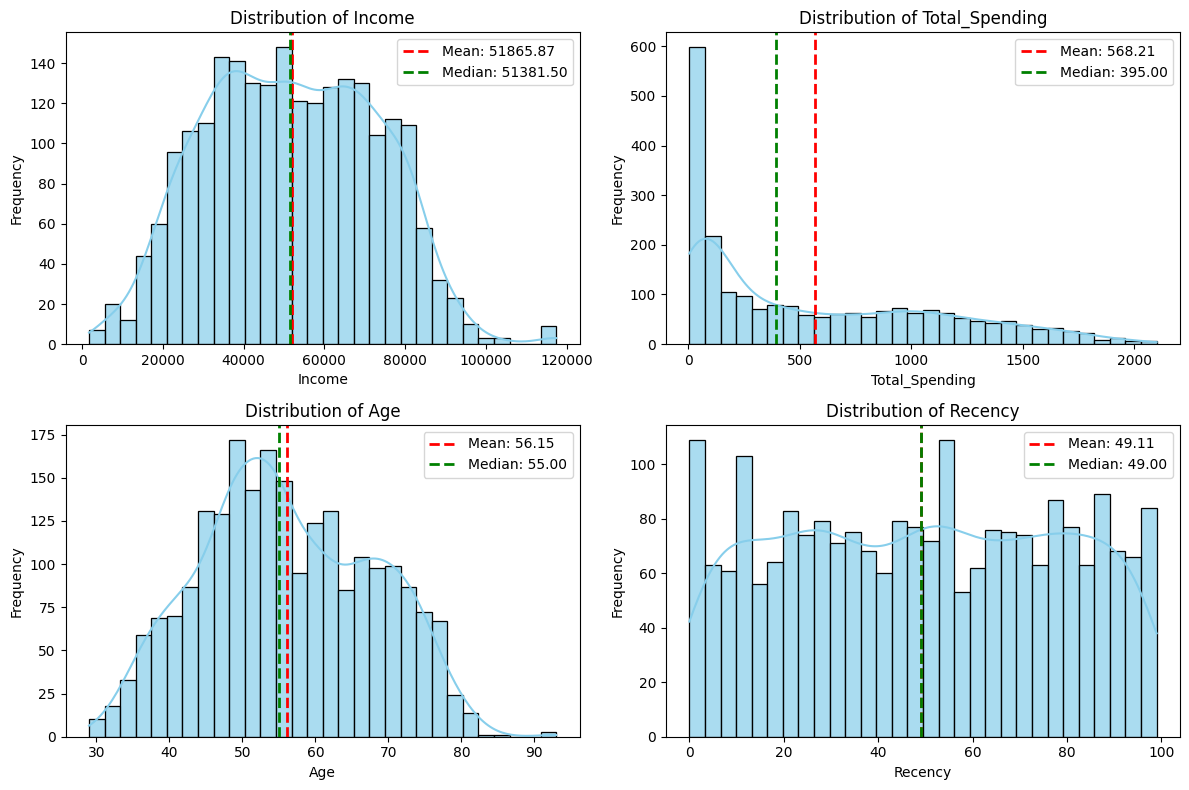

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define numerical columns
numerical_cols = ['Income', 'Total_Spending', 'Age', 'Recency']

# Set up the figure
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    
    # Plot histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Add Mean & Median lines
    mean_value = df[col].mean()
    median_value = df[col].median()
    
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    
    # Log scale for better visualization if needed
    if df[col].skew() > 1:  
        plt.yscale('log')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    
plt.tight_layout()
plt.show()

# Key Insight
##### Target High-Spenders: Since total spending is highly skewed, loyalty programs should focus on high-spending customers.
##### Engage Low-Spenders: Many customers have very low spending, indicating potential for marketing efforts to increase their engagement.
##### Middle-Aged Audience: Since most customers are 40-70 years old, marketing strategies should cater to middle-aged buyers.
##### Balanced Recency: Since recency is uniformly distributed, promotional campaigns should target all customer groups evenly, not just recent buyers.

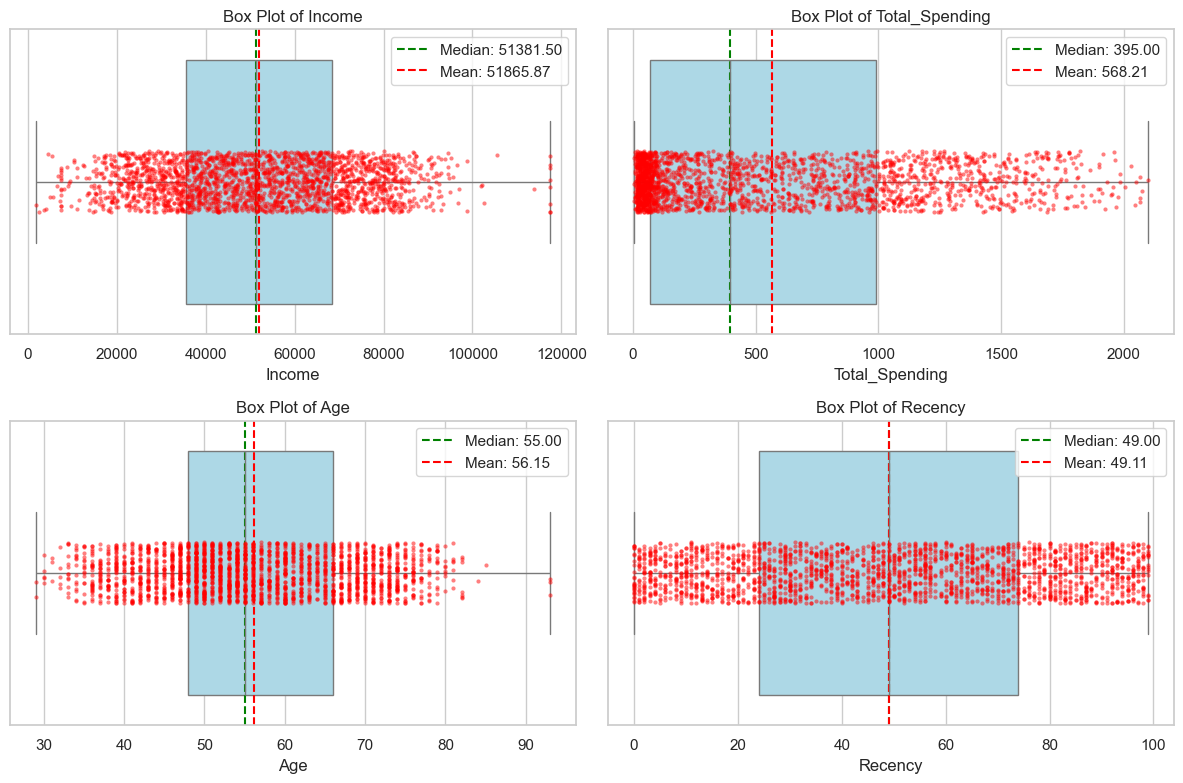

In [16]:
# Select numerical columns to visualize
num_cols = ['Income', 'Total_Spending', 'Age', 'Recency']

# Set style for better visualization
sns.set(style="whitegrid")

# Create box plots
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="lightblue", showfliers=True, boxprops=dict(facecolor="lightblue"))
    sns.stripplot(x=df[col], color="red", alpha=0.5, size=3, jitter=True)
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f"Median: {df[col].median():.2f}")
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
    plt.title(f"Box Plot of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

### Key Insight 
#### Income and Age distributions appear normal, but Income has a few high-value outliers.
#### Total Spending is highly skewed, with a few customers spending much more than the majority.
#### Recency has some extreme values, indicating varying customer engagement levels.

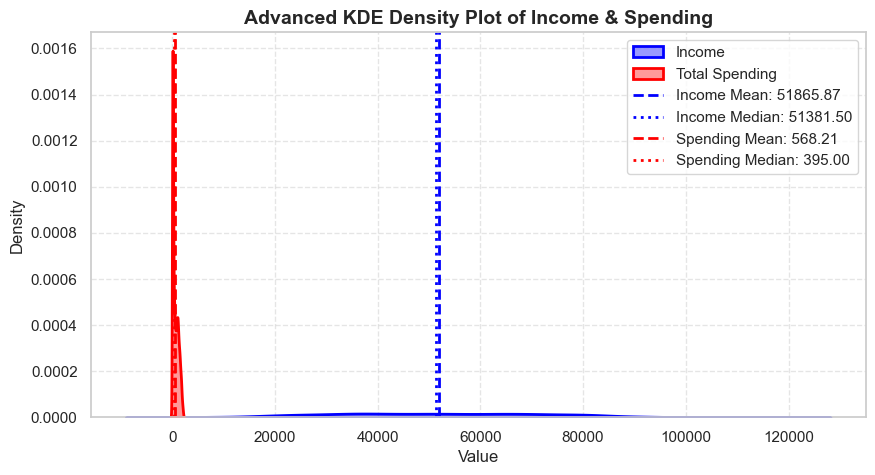

In [17]:
# Create Advanced KDE Plot
plt.figure(figsize=(10, 5))

# KDE for Income
sns.kdeplot(df["Income"], fill=True, color="blue", alpha=0.4, linewidth=2, label="Income", bw_adjust=0.8)

# KDE for Total Spending
sns.kdeplot(df["Total_Spending"], fill=True, color="red", alpha=0.4, linewidth=2, label="Total Spending", bw_adjust=0.8)

# Compute Mean & Median
income_mean, income_median = df["Income"].mean(), df["Income"].median()
spending_mean, spending_median = df["Total_Spending"].mean(), df["Total_Spending"].median()

# Add Mean & Median Lines
plt.axvline(income_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Income Mean: {income_mean:.2f}")
plt.axvline(income_median, color='blue', linestyle='dotted', linewidth=2, label=f"Income Median: {income_median:.2f}")

plt.axvline(spending_mean, color='red', linestyle='dashed', linewidth=2, label=f"Spending Mean: {spending_mean:.2f}")
plt.axvline(spending_median, color='red', linestyle='dotted', linewidth=2, label=f"Spending Median: {spending_median:.2f}")

# Titles and Labels
plt.title("Advanced KDE Density Plot of Income & Spending", fontsize=14, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

### Key Insight 
#### Income is normally distributed, while Total Spending is highly skewed.
#### Most customers have lower spending, but a few spend significantly more.
#### High-income customers do not always have high spending—this could indicate different spending habits.
#### Potential customer segmentation can be applied, identifying high-value customers separately.

### Categorical data,create count plots/bar plots, and pie charts.

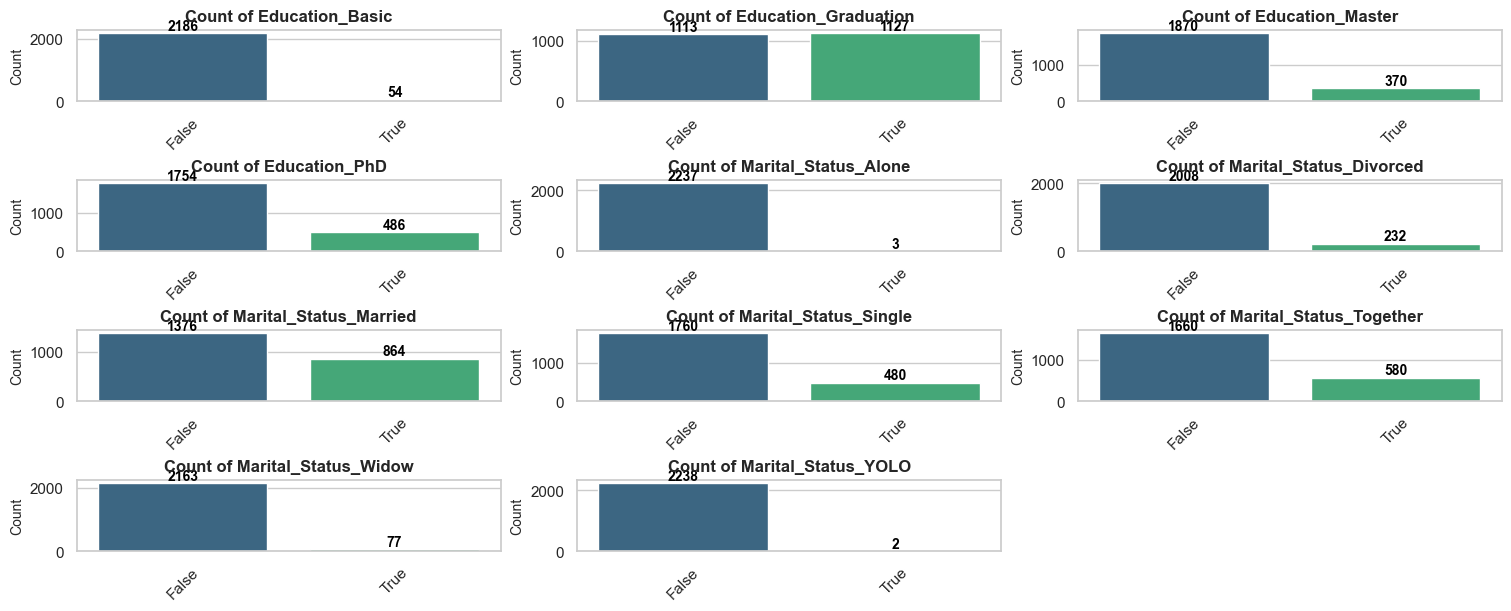

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Define categorical columns (Limit to 5 for visualization)
categorical_cols = [
    'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 
    'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 
    'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 
    'Marital_Status_YOLO'
]

# Define figure size dynamically based on categories
num_cols = len(categorical_cols[:11])
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensures proper grid structure

fig, axes = plt.subplots(rows, 3, figsize=(15, 6), constrained_layout=True)  # Optimized spacing
axes = axes.flatten()  # Flatten axes for easy iteration

# Advanced Count Plot with Annotations
for i, col in enumerate(categorical_cols[:11]):
    ax = axes[i]
    sns.countplot(data=df, x=col, palette='viridis', ax=ax)

    # Add count annotations on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    ax.set_title(f'Count of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel("")  # Remove x-label for cleaner look
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels

# Hide empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### Key Insight
#### Marketing & Targeting: Products/services related to education can focus on graduates, as they represent a large segment.
#### Customer Segmentation: Relationship status can be useful for personalizing offers (e.g., family-oriented marketing for married individuals).

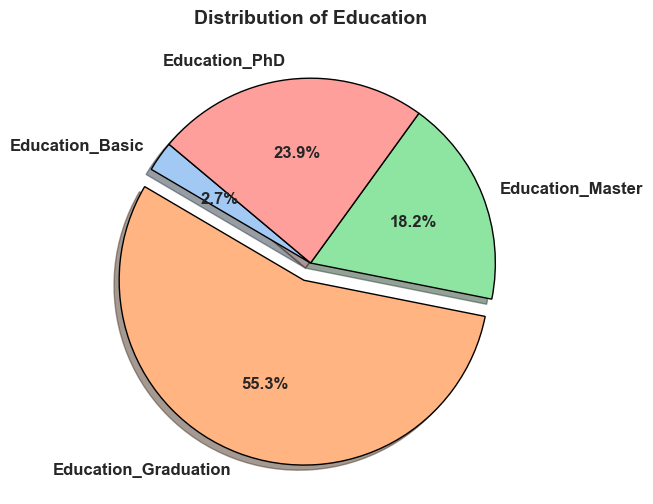

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant one-hot encoded categorical columns
categorical_cols = [
    'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD'
]

# Summing across rows to get total count per category
category_counts = df[categorical_cols].sum()

# Define colors using Seaborn
colors = sns.color_palette('pastel')[0:len(category_counts)]

# Explode the largest segment for better visibility
explode = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]

# Create the Pie Chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add border for clarity
)

# Customize text properties
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.title('Distribution of Education', fontsize=14, fontweight='bold')
plt.show()

### Key Insight 
#### Targeting Higher Education Holders: Since a large percentage of customers have a Master’s or Ph.D., businesses can offer specialized services, high-end products, or advanced learning opportunities.
#### Limited Basic Education: Since very few customers have only basic education, simplified or entry-level services may not be the best focus for this demographic.

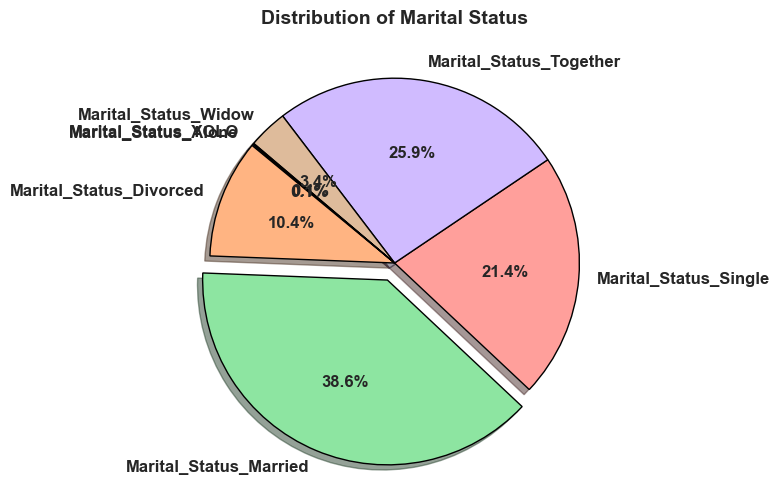

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant one-hot encoded categorical columns
categorical_cols = ['Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married',
    'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO'
]

# Summing across rows to get total count per category
category_counts = df[categorical_cols].sum()

# Define colors using Seaborn
colors = sns.color_palette('pastel')[0:len(category_counts)]

# Explode the largest segment for better visibility
explode = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]

# Create the Pie Chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add border for clarity
)

# Customize text properties
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.title('Distribution of Marital Status', fontsize=14, fontweight='bold')
plt.show()

### Key Insight 
#### Family and Relationship-Oriented Marketing: Since the majority are married or in a relationship, promotions for family products, couple-oriented experiences, and home-related services could be highly effective.
#### Targeting Singles with Lifestyle Brands: Since a significant portion is single, businesses can focus on individualistic and experience-driven marketing strategies.


### Bivariate Analysis
#### Numerical vs Numerical 

#### Scatter Plot

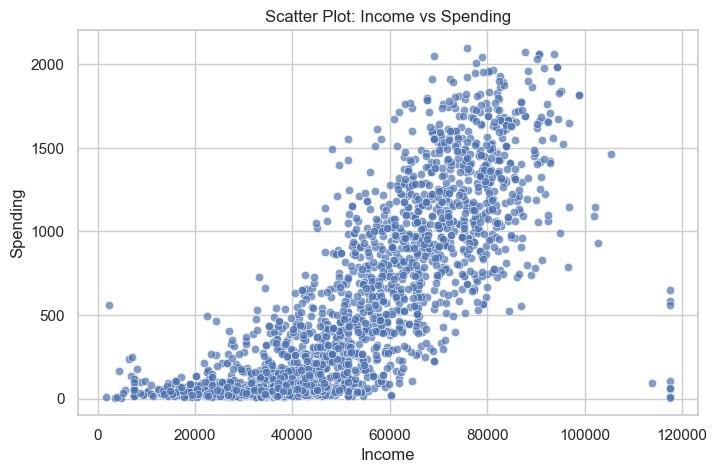

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Categorical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Numerical Variables


 # Scatter Plot (Example: Income vs. Spending)
# --------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Income"], y=df["Total_Spending"], alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Scatter Plot: Income vs Spending")
plt.show()



### Key Insight
#### Higher-income customers tend to spend more, but spending does not increase proportionally.
#### Some customers with moderate income levels exhibit high spending, possibly indicating a targeted segment.

### Pair plot


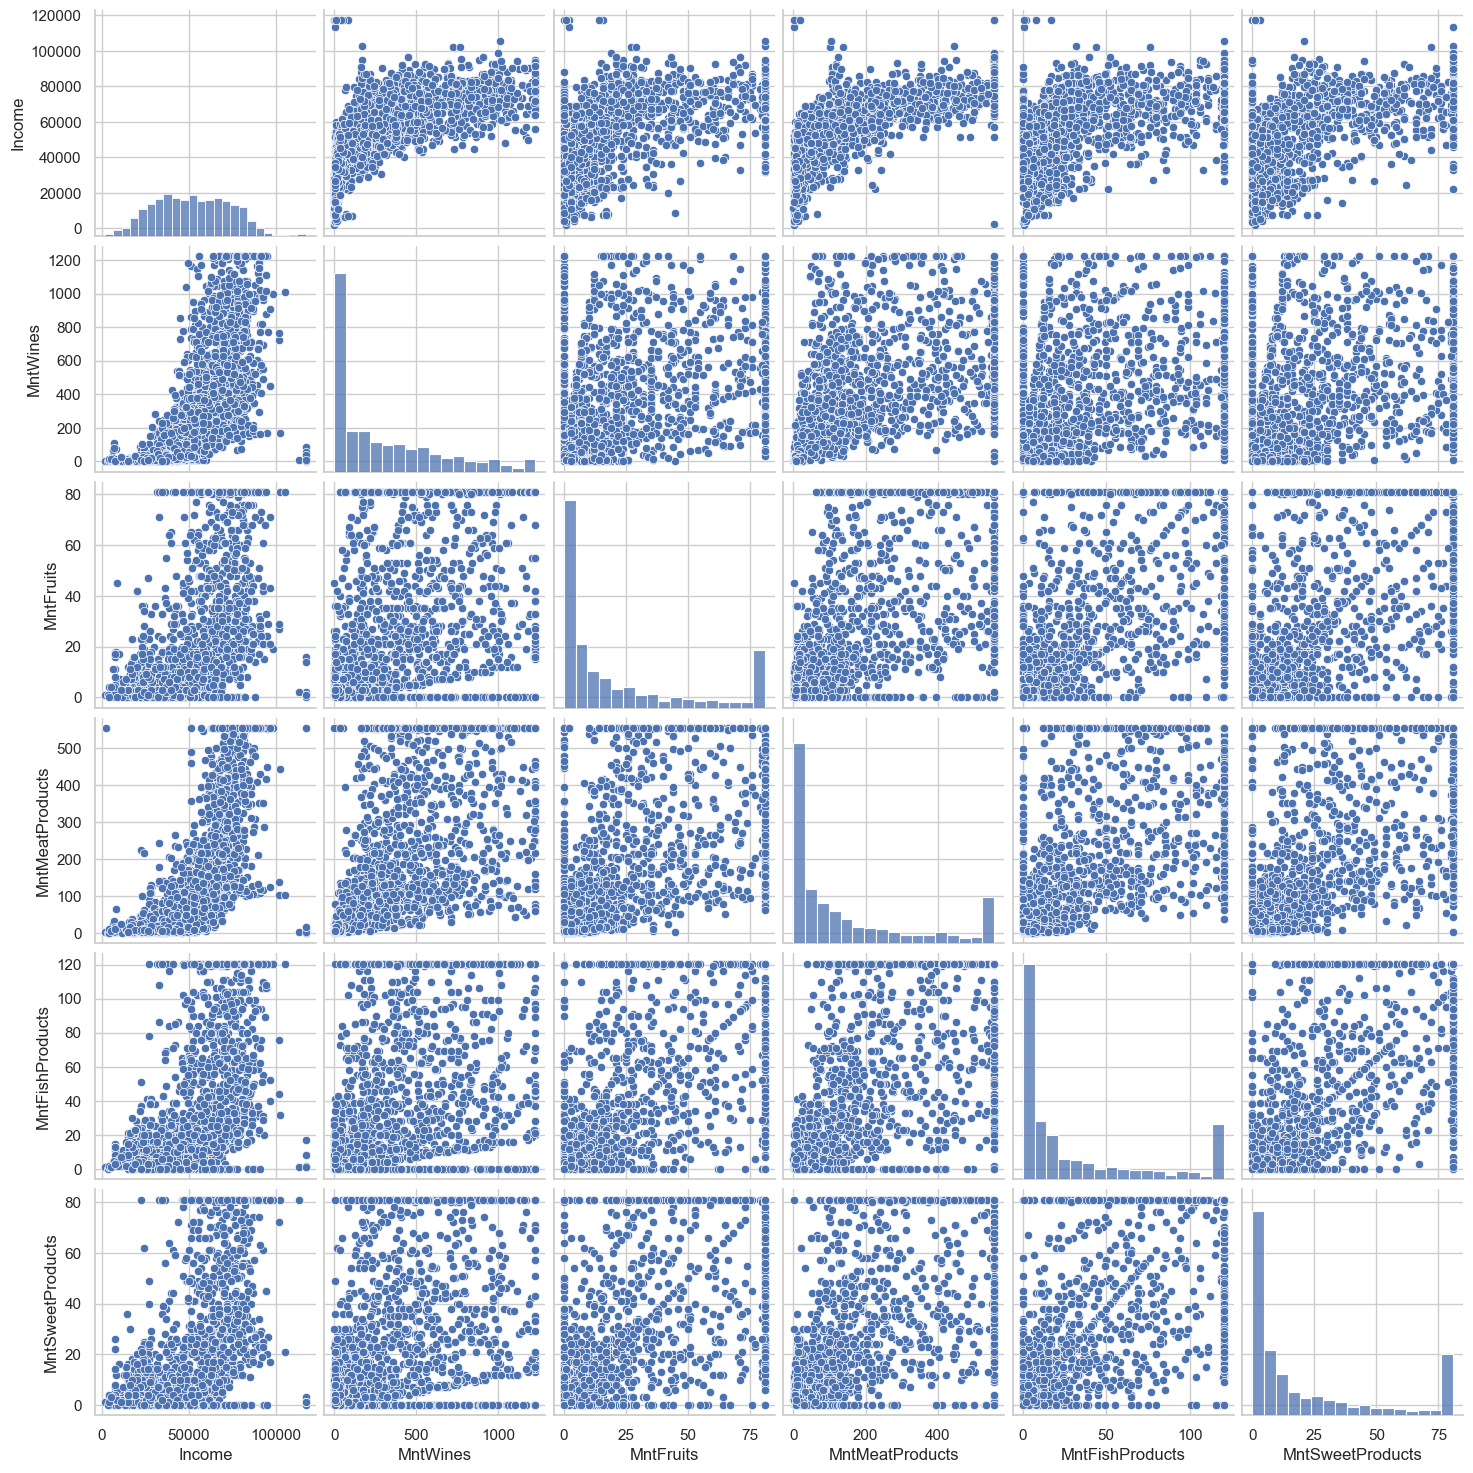

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for pair plot
selected_numerical_cols = ["Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]

# Generate pair plot for selected numerical variables
sns.pairplot(df[selected_numerical_cols])
plt.show()


### Key Insight
#### Wines have the highest spending among all product categories, showing a strong correlation with income.
#### Meat product purchases are moderately correlated with income, while fruit, fish, and sweet product spending are relatively low across income levels.

### Categorical vs Numerical 


### Box plot

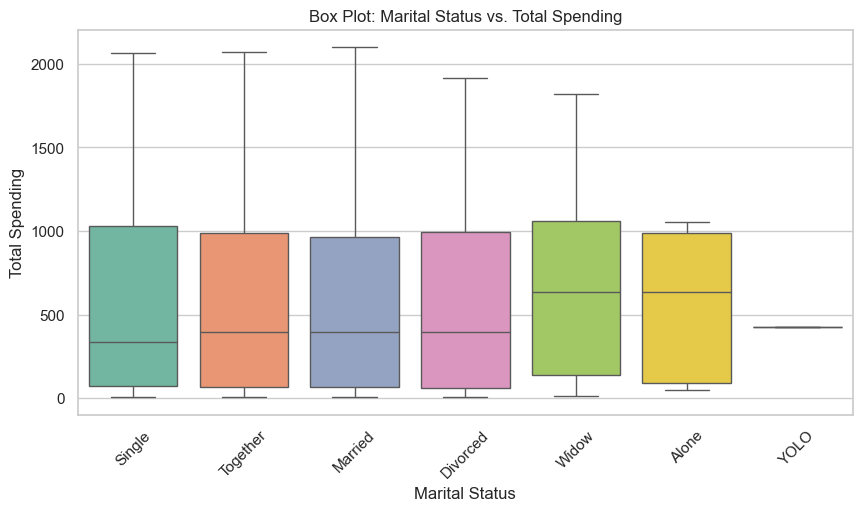

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct categorical columns from one-hot encoding
df["Marital_Status"] = df[
    ["Marital_Status_Alone", "Marital_Status_Divorced", "Marital_Status_Married",
     "Marital_Status_Single", "Marital_Status_Together", "Marital_Status_Widow",
     "Marital_Status_YOLO"]
].idxmax(axis=1).str.replace("Marital_Status_", "")


# Box Plot: Marital Status vs. Total Spending
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Marital_Status"], y=df["Total_Spending"], palette="Set2")
plt.xlabel("Marital Status")
plt.ylabel("Total Spending")
plt.title("Box Plot: Marital Status vs. Total Spending")
plt.xticks(rotation=45)
plt.show()




### Key Insight 
#### Customers who are Married and Together seem to have higher spending variability.
#### Singles and Widows have relatively lower total spending on average.
#### There are a few outliers with very high spending, particularly in the "Married" category.

### Bar plot

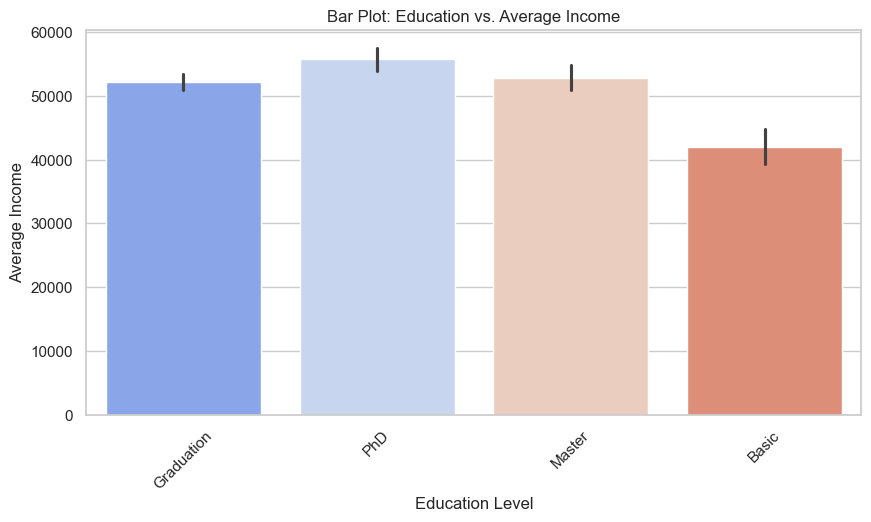

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct 'Education' column from one-hot encoding
df["Education"] = df[
    ["Education_Basic", "Education_Graduation", "Education_Master", "Education_PhD"]
].idxmax(axis=1).str.replace("Education_", "")

# Bar Plot: Education vs. Average Income
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Education"], y=df["Income"], palette="coolwarm", estimator=lambda x: sum(x)/len(x))
plt.xlabel("Education Level")
plt.ylabel("Average Income")
plt.title("Bar Plot: Education vs. Average Income")
plt.xticks(rotation=45)
plt.show()


### Key Insight 
#### High-income, high-spending customers (PhD holders, married individuals) may respond better to premium product promotions.
#### Customers with lower spending could be targeted with discounts or budget-friendly products.

### Correlation and Heatmaps

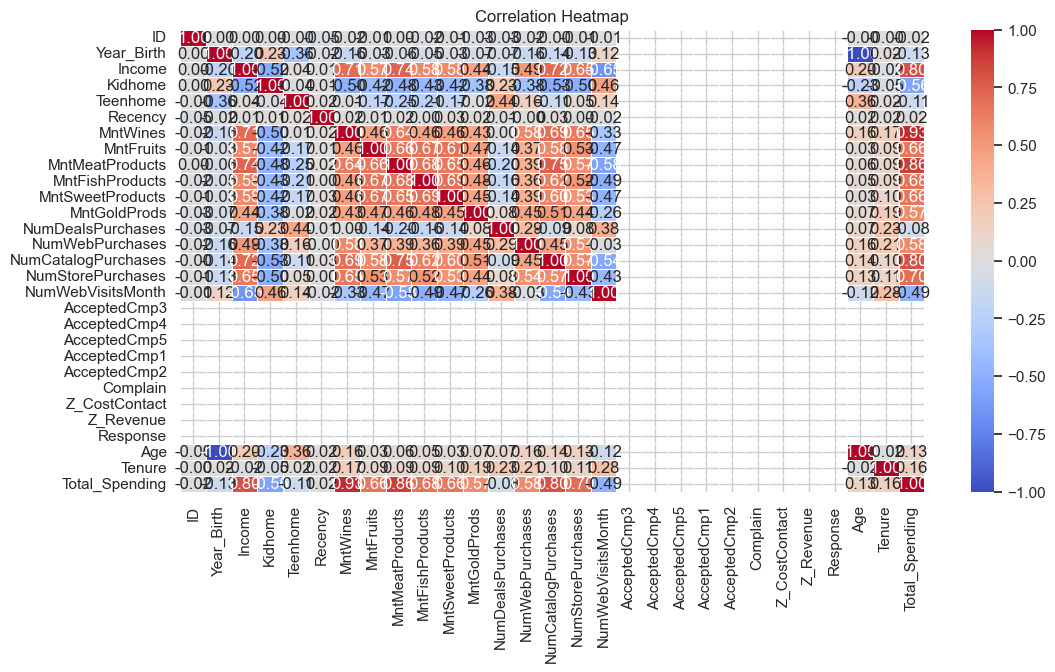

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Key Insight 
#### Strong Positive Correlation:
#### MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds are highly correlated with Total Spending.
🔹 Insight: Customers who spend more on one category (e.g., wine) tend to spend more on others too. These customers can be targeted for premium offers or cross-selling strategies.
#### NumWebPurchases and NumCatalogPurchases have a strong correlation.
🔹 Insight: Customers who buy through catalogs also tend to purchase online. This segment could benefit from exclusive online promotions or targeted marketing.
#### Strong Negative Correlation:
#### Recency (Days since last purchase) and Total Spending show a negative correlation.
🔹 Insight: Customers who purchased recently tend to have higher spending, indicating that frequent buyers are more valuable. Implementing loyalty programs for these customers could increase retention.
#### Moderate Correlations:
#### Income and Total Spending show a moderate positive correlation.
🔹 Insight: While higher-income customers spend more, the correlation isn't very strong. This suggests income alone isn't the best predictor of spending—other factors like family size or lifestyle might play a role.
#### Teenhome & Kidhome have a weak or no correlation with spending.
🔹 Insight: Households with kids or teenagers do not significantly impact spending patterns, meaning family size may not be a primary segmentation factor.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# Identify Highly Correlated Variables
# -------------------------

# Define a threshold for high correlation
threshold = 0.75

# Find pairs of variables with high correlation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Check absolute correlation
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Sort by highest correlation
high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False)

# Display the highly correlated feature pairs
print("Highly Correlated Features (Threshold > 0.75):")
print(high_corr_df)


Highly Correlated Features (Threshold > 0.75):
             Feature 1            Feature 2  Correlation
3       Total_Spending             MntWines     0.925891
4       Total_Spending      MntMeatProducts     0.863572
5       Total_Spending  NumCatalogPurchases     0.804661
2       Total_Spending               Income     0.803174
0  NumCatalogPurchases      MntMeatProducts     0.750007
1                  Age           Year_Birth    -1.000000


### Key Insight
#### Big Spenders Buy Wines & Meat – Customers spending more on wines (0.93) and meat (0.86) are high spenders overall. Target them with premium offers.

#### Higher Income = Higher Spending (0.80) – Wealthier customers spend more. Upsell luxury products.

#### Catalog Buyers Spend More (0.80) – Frequent catalog shoppers are high-value customers. Boost catalog promotions.

#### Meat Buyers Prefer Catalogs (0.75) – Those buying meat products often shop via catalogs. Bundle offers in catalogs.

#### Age vs. Year of Birth (-1.00) – Age is correctly derived from birth year. No action needed.